Sangsanae Harn-Udomlarp
Assignment2 - Part 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import chdir 
%matplotlib inline

In [6]:
#Read the dataset 
train_mat  = pd.read_table('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/trainMatrixModified.txt', header = None)
train_mat.shape


(5500, 800)

In [7]:
test_mat =  pd.read_table('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/testMatrixModified.txt', header = None)
test_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
modTerm = pd.read_table('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/modifiedterms.txt', header = None)
modTerm.head()

,0
0,david
1,rex
2,wood
3,subject
4,call


In [9]:
train_class = pd.read_table('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/trainClasses.txt', header = None, index_col=0)
train_class.head()

,1
0,
0,0
1,1
2,0
3,1
4,0


In [10]:
test_class = pd.read_table('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/testClasses.txt', header = None,  index_col=0)
test_class.head()

,1
0,
0,1
1,0
2,0
3,1
4,1


In [11]:
#Exploring shape 
print(train_mat.shape)
print(train_class.shape)
print(test_mat.shape)
print(test_class.shape)

(5500, 800)
(800, 1)
(5500, 200)
(200, 1)


In [12]:
#Transpose 
train_table  = train_mat.T
test_table = test_mat.T

In [14]:
#Convert frame to array
train_df = np.array(train_table)
test_df = np.array(test_table)
train_label = np.array(train_class)
test_label = np.array(test_class)
print(train_df.shape)
print(test_df.shape)
print(train_label.shape)
print(test_label.shape)

(800, 5500)
(200, 5500)
(800, 1)
(200, 1)


#### A). Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [15]:
def knn_search(x, D, L, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    n_label = L[idx[:K]]
    class0 = 0 
    class1 = 0
    for index in n_label:
        if L[index] == 0:
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        if class0 > class1:
            predicted_class = 0
        else:
            predicted_class = 1
    return idx[:K], predicted_class

In [16]:
n_idx, predicted_class = knn_search(test_df[0], train_df, train_label, 3, 1)
print("The Nearest Neighbours are:" + str(n_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[685 628 667]
The predicted class is: 1


#### B).Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label.

In [17]:
def accuracy(x, D, train_L, test_L, K, measure):
    count = 0
    correct = 0
    for i in range(x.shape[0]):
        n_idx, predicted_class = knn_search(x[i,:], D, train_L, K, measure)
        #If the two classes match, add 1 to the correct count
        if (predicted_class == test_L[i]):
            correct += 1
        count += 1
    acc = (correct/count)*100
    return acc

In [18]:
test_acc = accuracy(test_df, train_df, train_label, test_label, 5, 0)
print("Accuracy is: " + str(test_acc) + "%")

Accuracy is: 81.5%


#### C).Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [19]:
performance = np.zeros((20,3), dtype = float)
for i in range(0, 20):
    accEuclidean = accuracy(test_df, train_df, train_label, test_label, i+1, 0)
    accCosine = accuracy(test_df, train_df, train_label, test_label, i+1, 1)
    performance[i] = [i+1, accEuclidean, accCosine]
print("Performance:")
print(" K  Euclidean  Cosine")
for row in performance:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]) )

Performance:
 K  Euclidean  Cosine
 1   78.00    98.50
 2   67.50    98.00
 3   81.00    97.00
 4   77.00    98.00
 5   81.50    97.00
 6   83.50    97.50
 7   76.50    98.00
 8   80.00    97.50
 9   75.00    97.50
10   86.00    98.50
11   79.50    98.00
12   85.00    98.00
13   77.50    98.00
14   82.00    98.50
15   78.50    98.50
16   80.00    98.50
17   76.00    97.50
18   78.50    97.50
19   74.00    97.50
20   76.50    97.50


In [20]:
#Assign column
num_k = [performance[i][0] for i in range (len(performance))]
Euclidean = [performance[i][1] for i in range (len(performance))]
Cosine = [performance[i][2] for i in range (len(performance))]

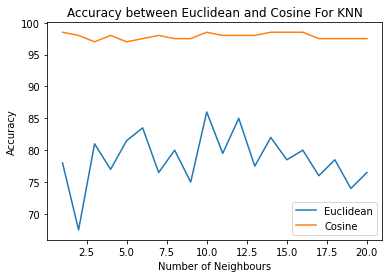

In [21]:
plt.plot(num_k, Euclidean, label = "Euclidean")
plt.plot(num_k, Cosine, label = "Cosine")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.title("Accuracy between Euclidean and Cosine For KNN")
plt.legend(loc="best")
plt.show()

#### D).Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on text categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [34]:
#Load dataeet for Matrix 

new_train_mat = np.loadtxt('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/trainMatrixModified.txt')
new_test_mat = np.loadtxt('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/testMatrixModified.txt')
train_label = np.genfromtxt('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/trainClasses.txt', delimiter='\t', usecols = (1), dtype = int)
test_label = np.genfromtxt('/Users/shinesang/Desktop/DSC478 machine learning/Homework2/newsgroups/testClasses.txt', delimiter='\t', usecols = (1), dtype = int)

In [35]:
new_train_mat_1 = new_train_mat.T
new_test_mat_1 = new_test_mat.T

In [36]:
# Concatenate train and test dataset
concatenateData = np.concatenate((new_train_mat, new_test_mat), axis=1)

In [37]:
# Search Document frequencies
df = np.array([(concatenateData !=0).sum(1)]).T
NDocs = len(concatenateData [0,:])


In [38]:
# Create a matrix with all entries = NDocs
NMatrix = np.ones(np.shape(concatenateData), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 ...
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]]


In [39]:
# Convert each entry into IDF values
IDF = np.log2(np.divide(NMatrix, df))
print(IDF)
print(IDF.shape)

[[3.94 3.94 3.94 ... 3.94 3.94 3.94]
 [7.16 7.16 7.16 ... 7.16 7.16 7.16]
 [6.51 6.51 6.51 ... 6.51 6.51 6.51]
 ...
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]
 [8.38 8.38 8.38 ... 8.38 8.38 8.38]]
(5500, 1000)


In [40]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = concatenateData  * IDF

In [41]:
pd.set_option("display.precision", 2)

TD_tfidf

array([[ 7.89,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [14.32,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [13.01,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [42]:
# Transpose the data
DT_tfidf = TD_tfidf.T
trainNum = 0.8 * len(DT_tfidf)
trainDT_tfidf = DT_tfidf[:int(trainNum),:]
testDT_tfidf = DT_tfidf[int(trainNum):,:]

In [43]:
performance2 = np.zeros((20,3), dtype = float)
for i in range(0, 20):
    accEuclidean = accuracy(test_df, train_df, train_label, test_label, i+1, 0)
    accCosine = accuracy(test_df, train_df, train_label, test_label, i+1, 1)
    performance2[i] = [i+1, accEuclidean, accCosine]
print("Performance:")
print(" K  Euclidean  Cosine")
for row in performance:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]) )

Performance:
 K  Euclidean  Cosine
 1   78.00    98.50
 2   67.50    98.00
 3   81.00    97.00
 4   77.00    98.00
 5   81.50    97.00
 6   83.50    97.50
 7   76.50    98.00
 8   80.00    97.50
 9   75.00    97.50
10   86.00    98.50
11   79.50    98.00
12   85.00    98.00
13   77.50    98.00
14   82.00    98.50
15   78.50    98.50
16   80.00    98.50
17   76.00    97.50
18   78.50    97.50
19   74.00    97.50
20   76.50    97.50


In [32]:
#Assign column
num_k2 = [performance2[i][0] for i in range (len(performance2))]
Euclidean2 = [performance2[i][1] for i in range (len(performance2))]
Cosine2 = [performance2[i][2] for i in range (len(performance2))]

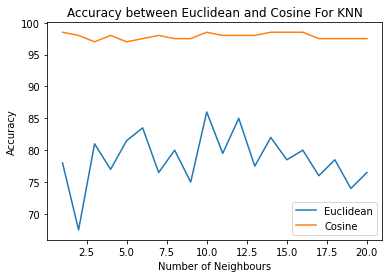

In [33]:
plt.plot(num_k2, Euclidean2, label = "Euclidean")
plt.plot(num_k2, Cosine2, label = "Cosine")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.title("Accuracy between Euclidean and Cosine For KNN")
plt.legend(loc="best")
plt.show()

Create a new classifier based on the Rocchio Method adapted for text categorization [See Week4_TextCategorization ].

In [44]:
# Create the Rocchio without TDIDF
def rocchio_train(data,labels):
    
    n_rows, n_cols = data.shape
    
    # Get a list of all the classes
    classes =  np.unique(labels)
    
    # Create array of prototypes to return later
    prototypes = {}
    
    # For each class
    for (i, cls) in enumerate(classes):
        
        # Get indexes of all documents that match our class
        indexes = np.array(labels.index[labels.iloc[:, 0] == cls])
        
        # Get all rows of data which are belong to this class)
        docs = data[indexes]
        
        # Add up all rows to get the prototype for the class
        p = np.sum(docs,axis=0)
        
        # Add each prototype to the result
        prototypes.update( {i : p} )
        
    # Return the array of prototypes
    return prototypes


In [45]:
from numpy import dot
from numpy.linalg import norm

def rocchio_classify(prototypes, instance):
    
    cs_best = -1
    p_best = -1
    
    # Obtain cosine similarity between instance and each prototype
    for k, v in prototypes.items():
        cs = dot(instance, v)/(norm(instance)*norm(v))
        
        # If cosine similarity greater than previous best, replace it
        if cs > cs_best:
            cs_best = cs
            
            # Update the most_likely prototype class
            p_best = k
            
    return p_best

In [47]:
# Store the prototypes - first for the total frequency (not the TFIDF)
prototypes = rocchio_train(train_df,train_class)

In [48]:
def rocchio_evaluate(data, labels, prototypes):
    total = len(data)
    correct = 0
    
    for i in range(len(data)):
        label = rocchio_classify(prototypes,data[i])
        if label == labels[i]: 
            correct += 1
    print("Correct: {}, Total: {}".format(correct,total))
    return correct/total

In [49]:
# Evaluate the accuracy of the test set for non-TFIDF
rocchio_evaluate(test_df,test_label,prototypes)

Correct: 195, Total: 200


0.975

From Rochio method, the accuracy is 97.5%. Comparing to K from 1 - 20, Euclidean can generate accuracy 86% at k = 10 while Cosine can provide accuracy 98.5% at K = 14. Therefore, Rochio is one of the good techniques to use for classification too.   

## Part2: Classification using scikit-learn [Dataset: bank_data.csv]

#### A).Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [58]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/shinesang/opt/anaconda3/lib/python3.8/site-packages (0.24.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
bankData = pd.read_csv('bank_data.csv', index_col=0)
bankData.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [4]:
bankData.columns

Index(['age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [5]:
#Bank Attribute
bank_atts = bankData[['age', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']]
bank_atts.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [6]:
# The target attribute
bank_target = bankData.pep
bank_target.head()

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

In [7]:
# Using the get_dummies for Pandas data frames
bank_dummy = pd.get_dummies(bank_atts)
bank_dummy.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
ID12106,57,37869.60,2,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
ID12107,22,8877.07,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
ID12108,58,24946.60,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0
ID12109,37,25304.30,2,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
from sklearn.model_selection import train_test_split
bank_train, bank_test, bank_target_train, bank_target_test = train_test_split(bank_dummy, bank_target, test_size=0.2, random_state=33)
np.set_printoptions(precision = 4, linewidth = 80, suppress = True)
print(bank_test.shape)
bank_test[0: 5]

(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12557,32,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
ID12467,59,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
ID12232,61,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
ID12549,53,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
ID12438,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


In [10]:
print (bank_train.shape)
bank_train[0:5]

(480, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12482,46,32583.5,2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
ID12187,25,15525.0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
ID12184,35,16394.4,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
ID12624,34,16291.0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1


#### B).Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [11]:
# Normalize dataset for KNN (0-1) Min-Max
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm = min_max_scaler.transform(bank_train)
bank_test_norm = min_max_scaler.transform(bank_test)

In [12]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
bank_train_norm[0: 5]

array([[0.57, 0.46, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.35, 0.18, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.33, 0.18, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

In [13]:
bank_test_norm[0: 5]

array([[0.29, 0.12, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.84, 0.41, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ],
       [0.88, 0.62, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.71, 0.75, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.96, 0.56, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

In [55]:
Using the KNN, decision tree, and Bayes classifier from sklearn

In [56]:
from sklearn import neighbors, tree, naive_bayes

In [57]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(weights='distance')

In [59]:
# Use predict function to create the predicted classes
knnpreds_test = knnclf.predict(bank_test_norm)
print(knnpreds_test)

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [64]:
# Use scikit learn to evaluate classifier accuracy
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.68      0.73      0.70        66
         YES       0.63      0.57      0.60        54

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



In [65]:
# confuse the matrix, compute the average accuracy score, and compare the performance 
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)
print(knnclf.score(bank_test_norm, bank_target_test))
print(knnclf.score(bank_train_norm, bank_target_train))

[[48 18]
 [23 31]]
0.6583333333333333
1.0


In [66]:
# Try n_neighbors = 10
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
knnpreds_test = knnclf.predict(bank_test_norm)
print(knnpreds_test)
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)
print(knnclf.score(bank_test_norm, bank_target_test))
print(knnclf.score(bank_train_norm, bank_target_train))

['NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']
              precision    recall  f1-score   support

          NO       0.67      0.73      0.70        66
         YES       0.62      0.56      0.59        54

    accuracy                           0.65       120
   macro avg       0.65      0.64      0.64       120
weighted avg       0.65      0.65      0.65       120

[[48 18]
 [24 3

In [67]:
# Try n_neighbors = 20
n_neighbors = 20

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
knnpreds_test = knnclf.predict(bank_test_norm)
print(knnpreds_test)
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)
print(knnclf.score(bank_test_norm, bank_target_test))
print(knnclf.score(bank_train_norm, bank_target_train))

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
              precision    recall  f1-score   support

          NO       0.64      0.73      0.68        66
         YES       0.60      0.50      0.55        54

    accuracy                           0.62       120
   macro avg       0.62      0.61      0.61       120
weighted avg       0.62      0.62      0.62       120

[[48 18]
 [27 27]]

In [68]:
# Try n_neighbors = 30
n_neighbors = 30

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
knnpreds_test = knnclf.predict(bank_test_norm)
print(knnpreds_test)
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)
print(knnclf.score(bank_test_norm, bank_target_test))
print(knnclf.score(bank_train_norm, bank_target_train))

['NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES']
              precision    recall  f1-score   support

          NO       0.71      0.80      0.75        66
         YES       0.71      0.59      0.65        54

    accuracy                           0.71       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.71      0.71      0.70       120

[[53 13]
 [22 32]]

In [69]:
# Try n_neighbors = 40
n_neighbors = 40

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
knnpreds_test = knnclf.predict(bank_test_norm)
print(knnpreds_test)
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)
print(knnclf.score(bank_test_norm, bank_target_test))
print(knnclf.score(bank_train_norm, bank_target_train))

['NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES']
              precision    recall  f1-score   support

          NO       0.69      0.82      0.75        66
         YES       0.71      0.56      0.63        54

    accuracy                           0.70       120
   macro avg       0.70      0.69      0.69       120
weighted avg       0.70      0.70      0.69       120

[[54 12]
 [24 30]]
0.

In [71]:
# Try n_neighbors = 100
n_neighbors = 100

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)
knnpreds_test = knnclf.predict(bank_test_norm)
print(knnpreds_test)
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)
print(knnclf.score(bank_test_norm, bank_target_test))
print(knnclf.score(bank_train_norm, bank_target_train))

['NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO']
              precision    recall  f1-score   support

          NO       0.64      0.82      0.72        66
         YES       0.66      0.43      0.52        54

    accuracy                           0.64       120
   macro avg       0.65      0.62      0.62       120
weighted avg       0.65      0.64      0.63       120

[[54 12]
 [31 23]]
0.6416666

In [74]:
# try without weight = 'distance'
n_neighbors = 30

knnclf = neighbors.KNeighborsClassifier(n_neighbors)
knnclf.fit(bank_train_norm, bank_target_train)
knnpreds_test = knnclf.predict(bank_test_norm)
print(knnpreds_test)
from sklearn.metrics import classification_report
print(classification_report(bank_target_test, knnpreds_test))
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(bank_target_test, knnpreds_test)
print(knncm)
print(knnclf.score(bank_test_norm, bank_target_test))
print(knnclf.score(bank_train_norm, bank_target_train))

['NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES']
              precision    recall  f1-score   support

          NO       0.68      0.86      0.76        66
         YES       0.75      0.50      0.60        54

    accuracy                           0.70       120
   macro avg       0.71      0.68      0.68       120
weighted avg       0.71      0.70      0.69       120

[[57  9]
 [27 27]]
0.7
0.67

# Discussion 

From comparing KNN's performance, we can see the scores do not increase when we increase number of K all the time. However, the best k which can create the high accuracy is 30. More so, when we compare numbr of K without weight distance, the result shows the weight distance is an important paramete. The score of prediction training set without weight distance is lower than we set weight distance - 0.68, and 1 respectively.

#### B).using scikit-learn's decision tree classifier (using the default parameters). 

In [77]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(bank_train, bank_target_train)
treepreds_test = treeclf.predict(bank_test)
print(treepreds_test)
print(classification_report(bank_target_test, treepreds_test))
treecm = confusion_matrix(bank_target_test, treepreds_test)
print(treecm)
print(treeclf.score(bank_test, bank_target_test))
print(treeclf.score(bank_train, bank_target_train))

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
              precision    recall  f1-score   support

          NO       0.82      0.85      0.84        66
         YES       0.81      0.78      0.79        54

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.82      0.82       120

[[56 10]
 [

#### C). using scikit-learn's the Naive Bayes (Gaussian) classifier. 

In [81]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)
print(nbpreds_test)
print(nbclf.score(bank_test, bank_target_test))
print(nbclf.score(bank_train, bank_target_train))

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO']
0.5916666666666667
0.65625


# Discussion

From the performance of KNN, decision tree and naive Bayes classifier, decision tree generated the highest score among these three techniques. The result shows decision tree performance test score is 82% while KNN and naive Bayers performance score are 70 and 59 respectively. Decision tree can create accuracy; however, it can generate the overfitting issue. To avoid overfitting, naive Bayes classifier can reduce overfiting because scores of test and train are in the average with 59% and 65%.

## Part 3: Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]

#### A).Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically

In [70]:
# Load Adult Census Dataset.
adultMod = pd.read_csv(r'/Users/shinesang/Desktop/DSC478 machine learning/Homework2/adult-modified.csv', na_values=["?"])
adultMod.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [71]:
adultMod.shape

(10000, 8)

In [72]:
adultMod.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [73]:
adultMod[adultMod.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...
9944,NaN,Private,12,Single,White,Female,45,<=50K
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [74]:
# Replace missing values with mean in age attribute
ageMean = adultMod.age.mean()
adultMod.age.fillna(ageMean, axis=0, inplace=True)
adultMod.isnull().sum()

age                 0
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [75]:
# Drop missing values from workclass attribute
adultMod.dropna(axis=0, inplace=True)
print(adultMod.isnull().sum())
print(adultMod.shape)

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64
(9412, 8)


In [76]:
adultMod.describe()

,age,education,hours-per-week
count,9412.00,9412.00,9412.00
mean,38.37,10.13,41.08
std,12.96,2.54,11.88
min,17.00,1.00,1.00
25%,28.00,9.00,40.00
50%,37.00,10.00,40.00
75%,47.00,13.00,45.00
max,90.00,16.00,99.00


In [77]:
adultMod.describe(include = "all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.00,9412,9412.00,9412,9412,9412,9412.00,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.37,NaN,10.13,NaN,NaN,NaN,41.08,NaN
std,12.96,NaN,2.54,NaN,NaN,NaN,11.88,NaN
min,17.00,NaN,1.00,NaN,NaN,NaN,1.00,NaN
25%,28.00,NaN,9.00,NaN,NaN,NaN,40.00,NaN
50%,37.00,NaN,10.00,NaN,NaN,NaN,40.00,NaN
75%,47.00,NaN,13.00,NaN,NaN,NaN,45.00,NaN


Text(0, 0.5, 'Frequency')

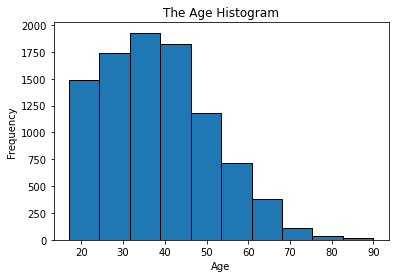

In [78]:
#Age Histogram
plt.hist(adultMod.age, edgecolor='black')
plt.title("The Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

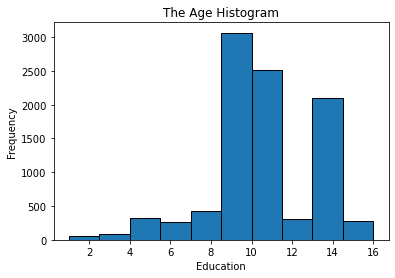

In [79]:
#The Education Histogram
plt.hist(adultMod.education, edgecolor='black')
plt.title("The Age Histogram")
plt.xlabel("Education")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

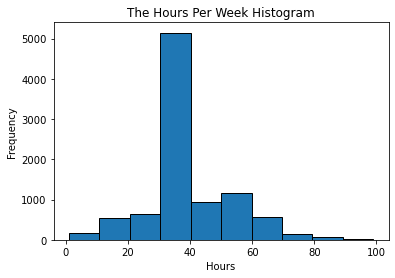

In [80]:
#Hours per week Histogram
plt.hist("hours-per-week",data = adultMod, edgecolor='black')
plt.title("The Hours Per Week Histogram")
plt.xlabel("Hours")
plt.ylabel("Frequency")

<AxesSubplot:title={'center':'Sex'}, xlabel='Sex', ylabel='Percentage'>

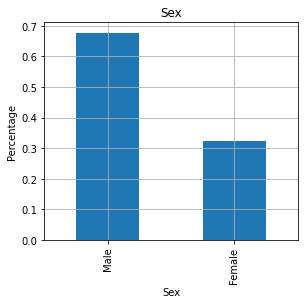

In [81]:
#Sex
sex_info = adultMod["sex"].value_counts()/adultMod["sex"].count()
fig = plt.figure(figsize=(10,4))
am = fig.add_subplot(121)
am.set_xlabel('Sex')
am.set_ylabel('Percentage')
am.set_title('Sex')
sex_info.plot(kind='bar', grid = True)

<AxesSubplot:title={'center':'come'}, xlabel='income', ylabel='Percentage'>

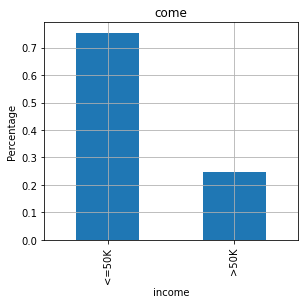

In [82]:
#Income
sex_info = adultMod["income"].value_counts()/adultMod["income"].count()
fig = plt.figure(figsize=(10,4))
am = fig.add_subplot(121)
am.set_xlabel('income')
am.set_ylabel('Percentage')
am.set_title('come')
sex_info.plot(kind='bar', grid = True)

Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income.

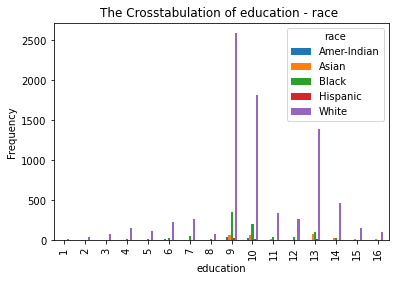

In [83]:
# The crosstabulation of education - race
plot1 = pd.crosstab(adultMod['education'],adultMod['race']).plot(kind = 'bar')
plt.title("The Crosstabulation of education - race ")
plot1.set_ylabel("Frequency")
plt.show(plot1)

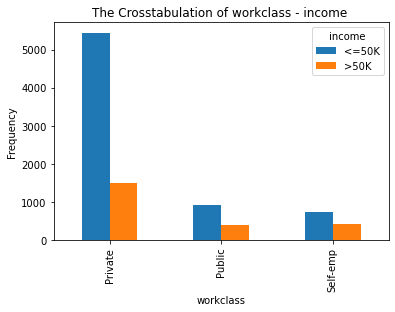

In [84]:
# The crosstabulation of workclass - income 
plot2 = pd.crosstab(adultMod['workclass'],adultMod['income']).plot(kind = 'bar')
plt.title("The Crosstabulation of workclass - income ")
plot2.set_ylabel("Frequency")
plt.show(plot2)

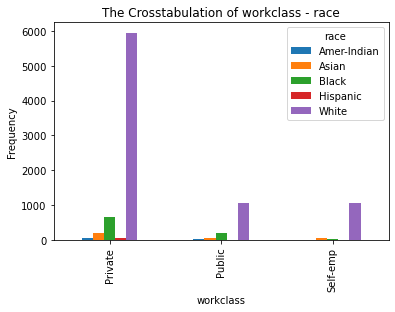

In [85]:
#The Crosstabulation of workclass - race
plot3 = pd.crosstab(adultMod['workclass'],adultMod['race']).plot(kind = 'bar')
plt.title("The Crosstabulation of workclass - race")
plot3.set_ylabel("Frequency")
plt.show(plot3)

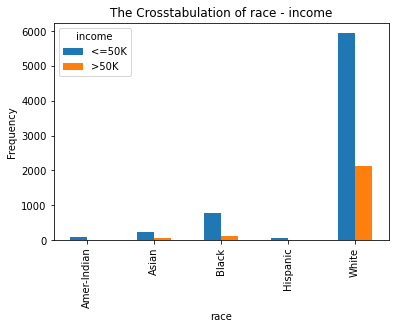

In [88]:
#The Crosstabulation of race - income
plot4 = pd.crosstab(adultMod['race'],adultMod['income']).plot(kind = 'bar')
plt.title("The Crosstabulation of race - income")
plot4.set_ylabel("Frequency")
plt.show(plot4)

Compare and contrast the characteristics of the low-income and high-income categories across the different attributes

In [89]:
# Income + Race
pd.crosstab(adultMod['race'],adultMod['income'])/adultMod.shape[0]*100

income,<=50K,>50K
race,,
Amer-Indian,0.88,0.10
Asian,2.38,0.71
Black,8.21,1.26
Hispanic,0.73,0.06
White,63.15,22.50


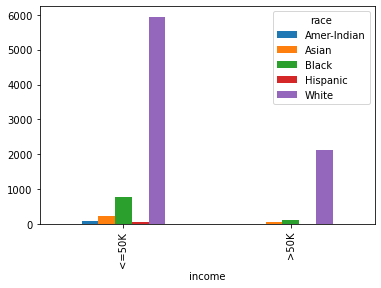

In [90]:
# Income + Race
adultMod.groupby(["income", "race"])["race"].count()
am = pd.crosstab(adultMod["income"], adultMod["race"])
plt.show(am.plot(kind = "bar"))

In [93]:
# Income + Workclass
pd.crosstab(adultMod['workclass'],adultMod['income'])/adultMod.shape[0]*100

income,<=50K,>50K
workclass,,
Private,57.83,15.98
Public,9.83,4.16
Self-emp,7.70,4.49


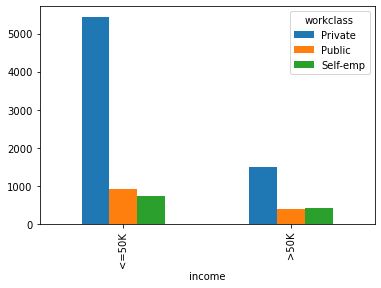

In [94]:
# Income + Workclass
adultMod.groupby(["income", "workclass"])["workclass"].count()
am = pd.crosstab(adultMod["income"], adultMod["workclass"])
plt.show(am.plot(kind = "bar"))

In [95]:
#Income + Marital Status# 
pd.crosstab(cencus['marital-status'],cencus['income'])/cencus.shape[0]*100

NameError: name 'cencus' is not defined

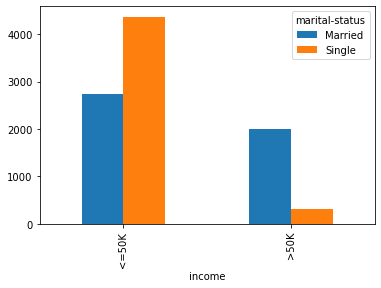

In [96]:
#Income + Marital Status
adultMod.groupby(["income", "marital-status"])["marital-status"].count()
am = pd.crosstab(adultMod["income"], adultMod["marital-status"])
plt.show(am.plot(kind = "bar"))

In [119]:
# Income + sex
pd.crosstab(adultMod['sex'],adultMod['income'])/adultMod.shape[0]*100

income,<=50K,>50K
sex,,
Female,28.36,3.82
Male,47.00,20.81


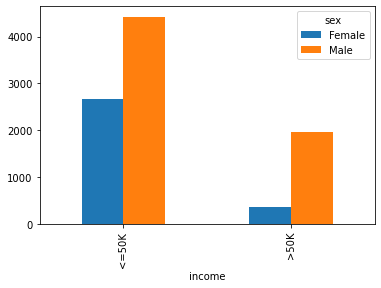

In [98]:
#Income + Sex
adultMod.groupby(["income", "sex"])["sex"].count()
am = pd.crosstab(adultMod["income"], adultMod["sex"])
plt.show(am.plot(kind = "bar"))

#### B).Classification and Model Evaluation

In [99]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [100]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import model_selection

In [101]:
adult_dummy = pd.get_dummies(adultMod)
adult_dummy.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37.0,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49.0,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52.0,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31.0,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42.0,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [102]:
# Drop columns that have income lower than 50k
adultMod2 = adult_dummy.drop(columns = ['income_<=50K'], axis = 1)
adultMod2.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0


In [103]:
adultMod2.columns

Index(['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male', 'income_>50K'],
      dtype='object')

In [104]:
# Set target variable
am_target = adultMod2['income_>50K']
am_target.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
Name: income_>50K, dtype: uint8

In [105]:
# Explore Attribute variable
am_atts = adultMod2[['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male']]
am_atts.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA).

In [106]:
# Train - Test set
from sklearn.model_selection import train_test_split
am_train, am_test, am_target_train, am_target_test = train_test_split(am_atts, am_target, test_size=0.2, random_state=33)

print (am_test.shape)
am_test[0:5]

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8419,56.0,10,45,1,0,0,1,0,0,0,0,0,1,0,1
2629,54.0,9,45,1,0,0,1,0,0,0,0,0,1,0,1
2523,52.0,11,35,1,0,0,0,1,0,0,0,0,1,1,0
7143,42.0,16,60,0,0,1,1,0,0,0,0,0,1,0,1
5902,30.0,9,50,0,0,1,1,0,0,0,0,0,1,0,1


In [107]:
from sklearn import model_selection

In [109]:
# Naive Bayes Gaussian
nbclf = naive_bayes.GaussianNB()
cv_scores = model_selection.cross_val_score(nbclf, am_train, am_target_train, cv=10)
print (cv_scores)
print("The overall average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

nbclf = nbclf.fit(am_train, am_target_train)
print ("Accuracy on Training: ",  nbclf.score(am_train, am_target_train))

[0.71 0.73 0.72 0.71 0.72 0.71 0.73 0.72 0.71 0.72]
The overall average accuracy: 0.72 (+/- 0.02)
Accuracy on Training:  0.720547217425953


In [110]:
# LDA (linear discriminant analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
cv_scores = model_selection.cross_val_score(ldclf, am_train, am_target_train, cv=10)
print (cv_scores)
print("The overall average accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

ldclf = ldclf.fit(am_train, am_target_train)
print ("Accuracy on Training: ",  ldclf.score(am_train, am_target_train))

[0.8  0.82 0.78 0.79 0.8  0.8  0.81 0.83 0.82 0.81]
The overall average accuracy on X-Val: 0.81 (+/- 0.03)
Accuracy on Training:  0.8063487846991633


In [112]:
# Decision Tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
cv_scores = model_selection.cross_val_score(treeclf, am_train, am_target_train, cv=10)
print (cv_scores)
print("The overall average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(am_train, am_target_train)
print ("Accuracy on Training: ",  treeclf.score(am_train, am_target_train))

[0.77 0.77 0.77 0.76 0.78 0.75 0.79 0.76 0.77 0.79]
The overall average accuracy: 0.77 (+/- 0.02)
Accuracy on Training:  0.942887501660247


### Visualizing the decision tree

In [114]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='tree.dot', feature_names= am_train.columns)

In [1]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Alternatively, you can use GraphViz or some other tool outside Jupyter environment to 

In [117]:
system(dot -Tpng tree.dot -o dtree.png)

['zsh:1: command not found: dot']

In [118]:
from IPython.display import Image
Image(filename='tree.png', width=800)

FileNotFoundError: [Errno 2] No such file or directory: 'dtree.png'

In [ ]:
I cannot diplay the graph. I installed graphviz, but it is still not work.